In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset_train = pd.read_csv(r'Google_Stock_Price_Train.csv')

training_set = dataset_train.iloc[:, 1:2].values

In [3]:
training_set.shape

(1258, 1)

In [4]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [5]:
X_train = []
y_train = []
for i in range(60, 1257): 
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [6]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [7]:
X_train.shape

(1197, 60, 1)

In [8]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [9]:
regressor = Sequential()

In [10]:
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

In [11]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [12]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [13]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

In [14]:
regressor.add(Dense(units = 1))

In [15]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [16]:
regressor.fit(X_train, y_train, epochs = 200, batch_size = 32)

Epoch 1/200
38/38 [==============================] - 7s 45ms/step - loss: 0.0369
Epoch 2/200
38/38 [==============================] - 2s 47ms/step - loss: 0.0065
Epoch 3/200
38/38 [==============================] - 2s 47ms/step - loss: 0.0060
Epoch 4/200
38/38 [==============================] - 2s 66ms/step - loss: 0.0059
Epoch 5/200
38/38 [==============================] - 2s 50ms/step - loss: 0.0050
Epoch 6/200
38/38 [==============================] - 2s 50ms/step - loss: 0.0057
Epoch 7/200
38/38 [==============================] - 3s 91ms/step - loss: 0.0050
Epoch 8/200
38/38 [==============================] - 3s 70ms/step - loss: 0.0046
Epoch 9/200
38/38 [==============================] - 2s 51ms/step - loss: 0.0046
Epoch 10/200
38/38 [==============================] - 2s 47ms/step - loss: 0.0042
Epoch 11/200
38/38 [==============================] - 3s 80ms/step - loss: 0.0049
Epoch 12/200
38/38 [==============================] - 3s 68ms/step - loss: 0.0045
Epoch 13/200
38/38 [=====

In [17]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [18]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis =0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []

In [19]:
inputs.shape

(80, 1)

In [20]:
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

1/1 [==============================] - 1s 1s/step


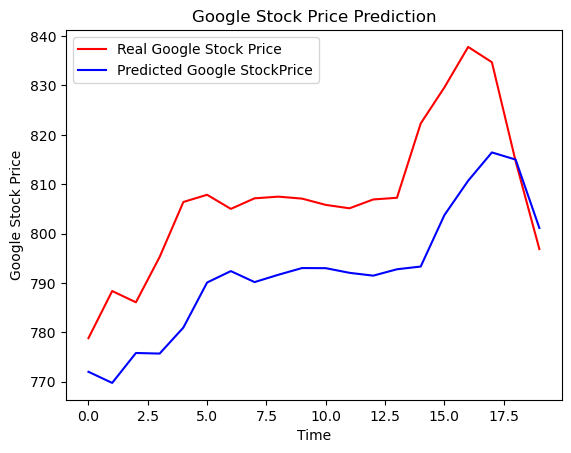

In [21]:
# Visualising the results
plt.plot(real_stock_price, color = 'red',label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue',label='Predicted Google StockPrice')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()